<a href="https://colab.research.google.com/github/AjayKarthi14/DSML/blob/main/Jamboree_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso , Ridge , ElasticNet
from sklearn.metrics import mean_squared_error , mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it
GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with
minimum effort.

They recently launched a feature where students/ learners can come to their website and check
their probability of getting into the IVY league college. This feature estimates the chances of
graduate admission from an Indian perspective.

We try to understand what factors are important in graduate
admissions and how these factors are interrelated among themselves and will also help predict one's chances of admission given the rest of the variables.

# Downloading Dataset

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 44.1MB/s]


In [ ]:
df = pd.read_csv("Jamboree_Admission.csv")
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [ ]:
df.tail()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
495         1              0.87  
496         1              0.96  
497         1              0.93  
498         0              0.73  
499         0              0.84

# Basic Observations, value counts and unique values

In [ ]:
# Total Data points : 500 and features available : 9
df.shape

(500, 9)

In [ ]:
# There are 500 data points and 9 features containing 4 float type and 5 int type each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# Null values in each column
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Number of unique values for each 9 attributes
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [ ]:
df.drop('Serial No.', inplace = True , axis = 1)

In [ ]:
# Mean, Median, Percentile - 25:50:75, Min, Max and Standard Deviation of Integer type attributes
df.describe()

GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.63000  
50%      8.560000    1.000000           0.72000  
75%      9.040000    1.000000           0.82000  
max      9.920000    1.000000           0.97000

In [ ]:
# University Rating split percentage of total
df['University Rating'].value_counts(normalize = True) * 100

3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64

In [ ]:
# Strength of "Statement Of Purpose" split percentage of total
df['SOP'].value_counts(normalize = True) * 100

4.0    17.8
3.5    17.6
3.0    16.0
2.5    12.8
4.5    12.6
2.0     8.6
5.0     8.4
1.5     5.0
1.0     1.2
Name: SOP, dtype: float64

In [ ]:
# Strength of "Letter of Recommendation " split percentage of total
df['LOR '].value_counts(normalize = True) * 100

3.0    19.8
4.0    18.8
3.5    17.2
4.5    12.6
2.5    10.0
5.0    10.0
2.0     9.2
1.5     2.2
1.0     0.2
Name: LOR , dtype: float64

In [ ]:
# Research Experience split percentage of total
df['Research'].value_counts(normalize = True) * 100

1    56.0
0    44.0
Name: Research, dtype: float64

# Univariate Data Analysis and Visualisation

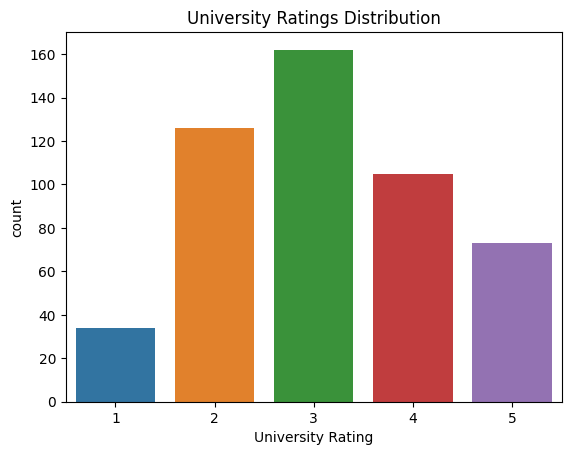

In [ ]:
# Count plot on the University Ratings
sns.countplot(x = 'University Rating' , data = df)
plt.title("University Ratings Distribution")
plt.show()

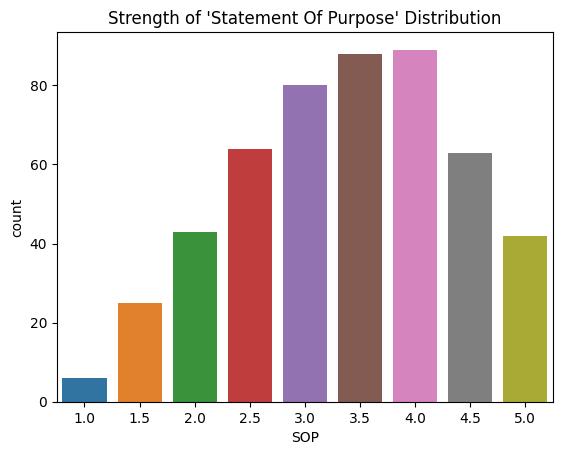

In [ ]:
# Count plot on the Strength of "Statement Of Purpose"
sns.countplot(x = 'SOP' , data = df)
plt.title("Strength of 'Statement Of Purpose' Distribution")
plt.show()

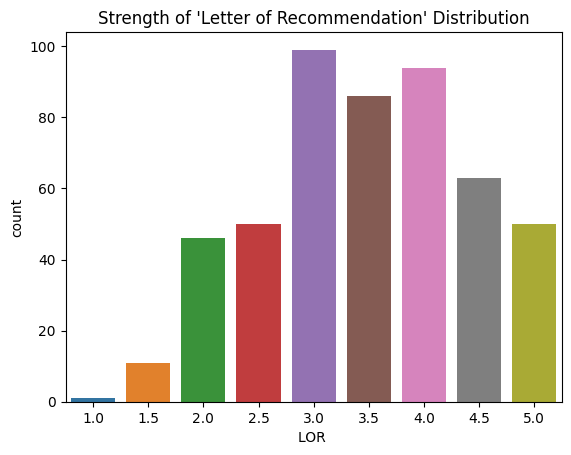

In [ ]:
# Count plot on the Strength of "Statement Of Purpose"
sns.countplot(x = 'LOR ' , data = df)
plt.title("Strength of 'Letter of Recommendation' Distribution")
plt.show()

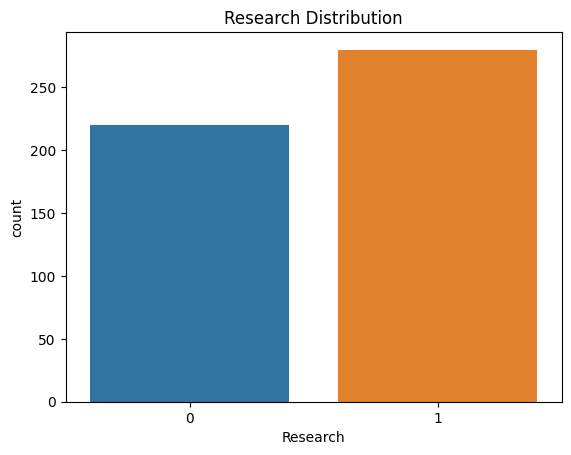

In [ ]:
# Count plot on the Research
sns.countplot(x = 'Research' , data = df)
plt.title("Research Distribution")
plt.show()

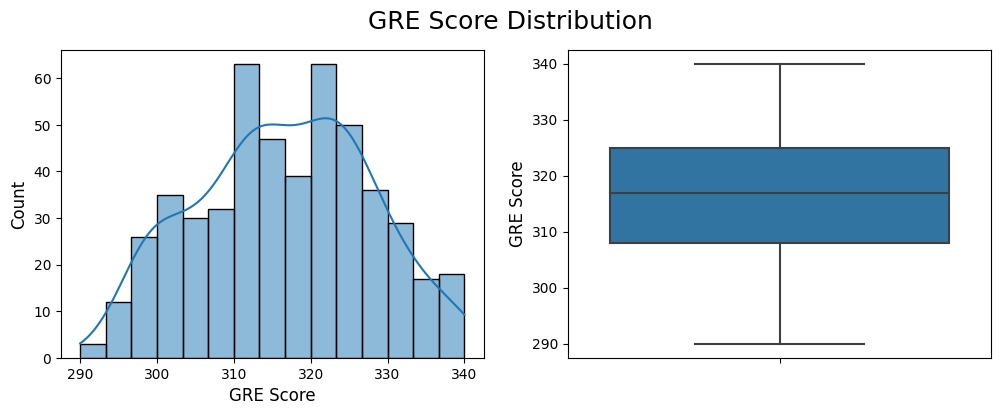

In [ ]:
# GRE Score Distribution
# 50% of the GRE Scores fall in the range 308 - 326

fig = plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.histplot(x = df['GRE Score'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('GRE Score' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)

plt.subplot(1,2,2)
sns.boxplot(y = df['GRE Score'])
plt.yticks(fontsize = 10)
plt.ylabel('GRE Score' , fontsize = 12)

fig.suptitle("GRE Score Distribution" , fontsize = 18)
plt.show()

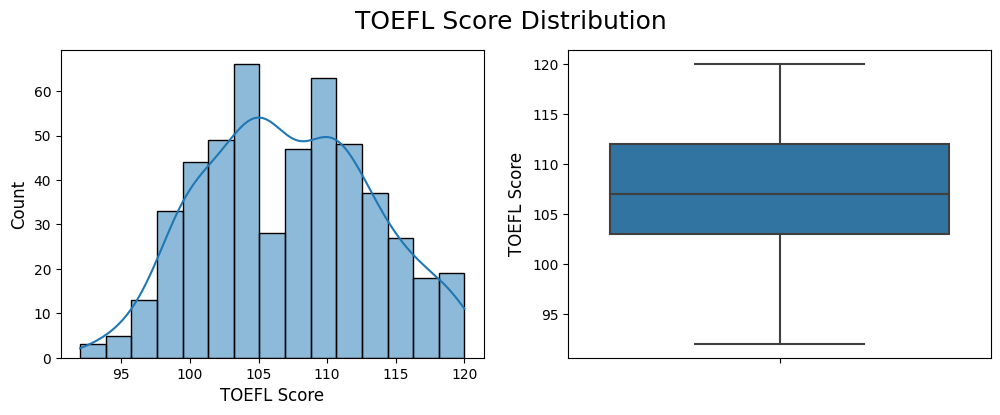

In [ ]:
# TOEFL Score Distribution
# 50% of the GRE Scores fall in the range 103 - 113

fig = plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.histplot(x = df['TOEFL Score'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('TOEFL Score' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)

plt.subplot(1,2,2)
sns.boxplot(y = df['TOEFL Score'])
plt.yticks(fontsize = 10)
plt.ylabel('TOEFL Score' , fontsize = 12)

fig.suptitle("TOEFL Score Distribution" , fontsize = 18)
plt.show()

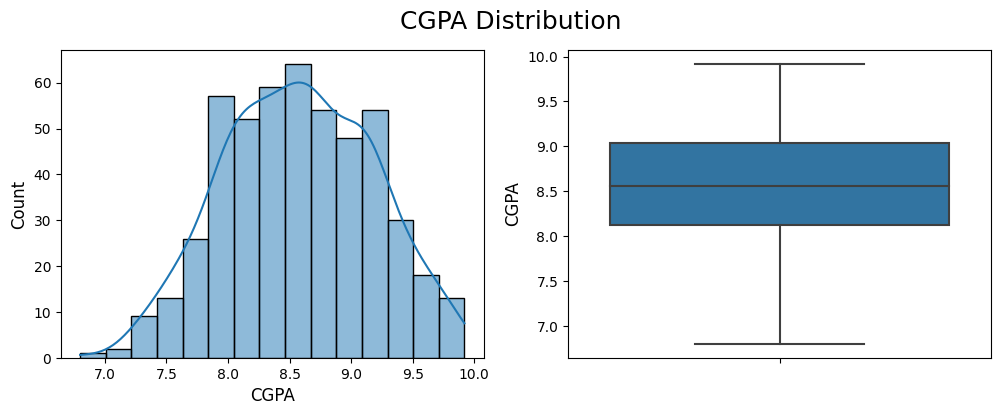

In [ ]:
# CGPA Distribution
# 50% of the CGPA fall in the range 8.2 - 9.0

fig = plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.histplot(x = df['CGPA'] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('CGPA' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)

plt.subplot(1,2,2)
sns.boxplot(y = df['CGPA'])
plt.yticks(fontsize = 10)
plt.ylabel('CGPA' , fontsize = 12)

fig.suptitle("CGPA Distribution" , fontsize = 18)
plt.show()

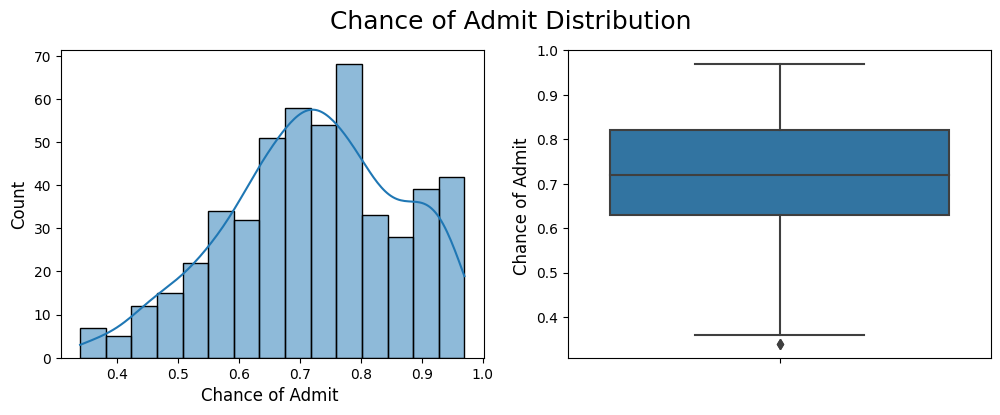

In [ ]:
# Chance of Admit Distribution
# 50% of the CGPA fall in the range 0.63 - 0.82

fig = plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.histplot(x = df['Chance of Admit '] , bins = 15 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Chance of Admit ' , fontsize = 12)
plt.ylabel('Count' , fontsize = 12)

plt.subplot(1,2,2)
sns.boxplot(y = df['Chance of Admit '])
plt.yticks(fontsize = 10)
plt.ylabel('Chance of Admit ' , fontsize = 12)

fig.suptitle("Chance of Admit Distribution" , fontsize = 18)
plt.show()

# Bivariate and multivariate Visualisation

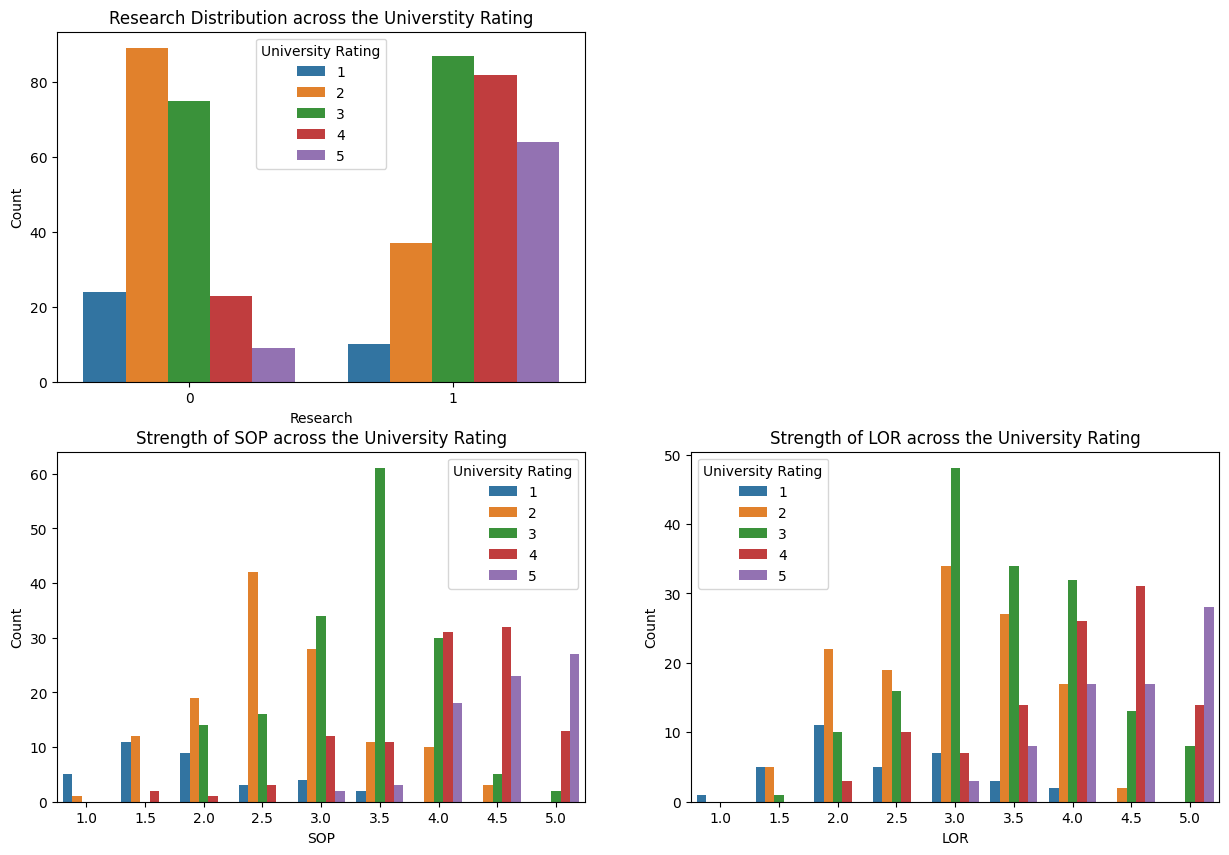

In [ ]:
# Weightage of Research, LOR, and SOP Distribution across the University Ratings
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.countplot(x = 'Research' , data = df , hue = 'University Rating')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Research' , fontsize = 10)
plt.ylabel('Count' , fontsize = 10)
plt.title("Research Distribution across the Universtity Rating" , fontsize = 12)

plt.subplot(2,2,3)
sns.countplot(x = 'SOP' , data = df , hue = 'University Rating')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('SOP' , fontsize = 10)
plt.ylabel('Count' , fontsize = 10)
plt.title("Strength of SOP across the University Rating" , fontsize = 12)

plt.subplot(2,2,4)
sns.countplot(x = 'LOR ' , data = df , hue = 'University Rating')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('LOR' , fontsize = 10)
plt.ylabel('Count' , fontsize = 10)
plt.title("Strength of LOR across the University Rating" , fontsize = 12)

plt.show()

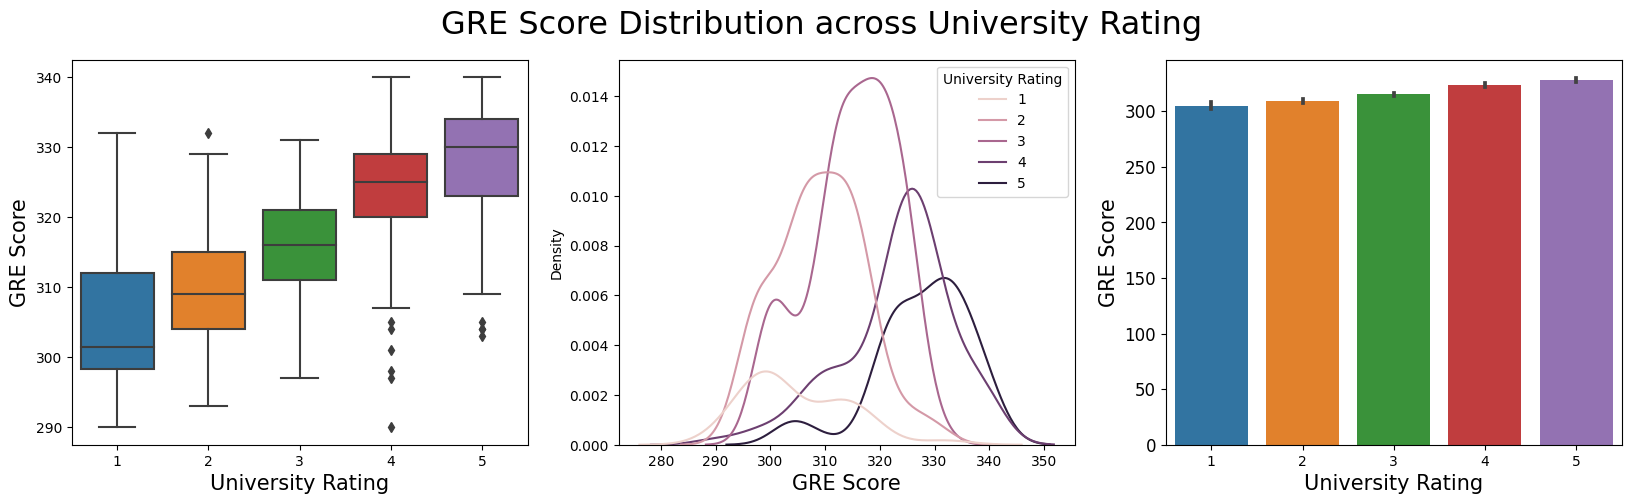

In [ ]:
# GRE Score Distribution across University Rating
# We can see that the Mean GRE Score and the distribution increases with increase in Univeraity Ratings and there are some outliers in top universities with low GRE Scores

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'GRE Score' , data = df , x = 'University Rating')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('University Rating' , fontsize = 15)
plt.ylabel('GRE Score' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'GRE Score' , data = df , hue = 'University Rating')
plt.xticks(fontsize = 10)
plt.xlabel('GRE Score' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'GRE Score' , data = df , x = 'University Rating' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('University Rating' , fontsize = 15)
plt.ylabel('GRE Score' , fontsize = 15)

fig.suptitle("GRE Score Distribution across University Rating" , fontsize = 23)
plt.show()

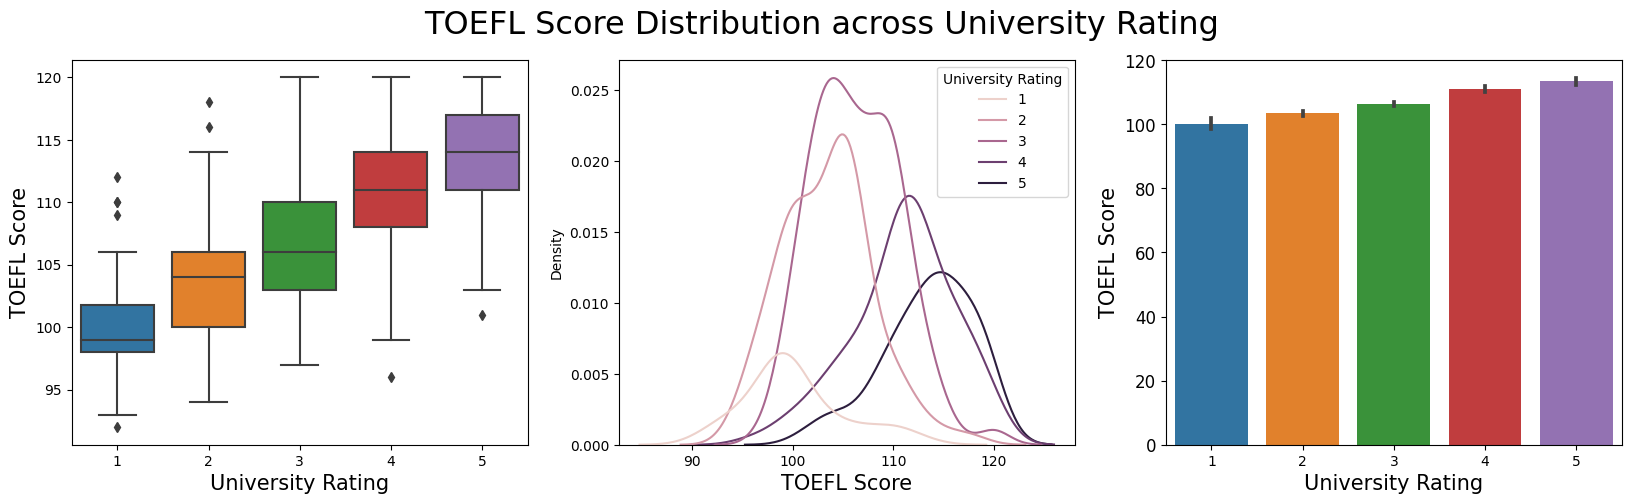

In [ ]:
# TOEFL Score Distribution across University Rating
# We can see that the Mean TOEFL Score and the distribution increases with increase in Univeraity Ratings and there are some outliers in Low University Ratings

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'TOEFL Score' , data = df , x = 'University Rating')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('University Rating' , fontsize = 15)
plt.ylabel('TOEFL Score' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'TOEFL Score' , data = df , hue = 'University Rating')
plt.xticks(fontsize = 10)
plt.xlabel('TOEFL Score' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'TOEFL Score' , data = df , x = 'University Rating' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('University Rating' , fontsize = 15)
plt.ylabel('TOEFL Score' , fontsize = 15)

fig.suptitle("TOEFL Score Distribution across University Rating" , fontsize = 23)
plt.show()

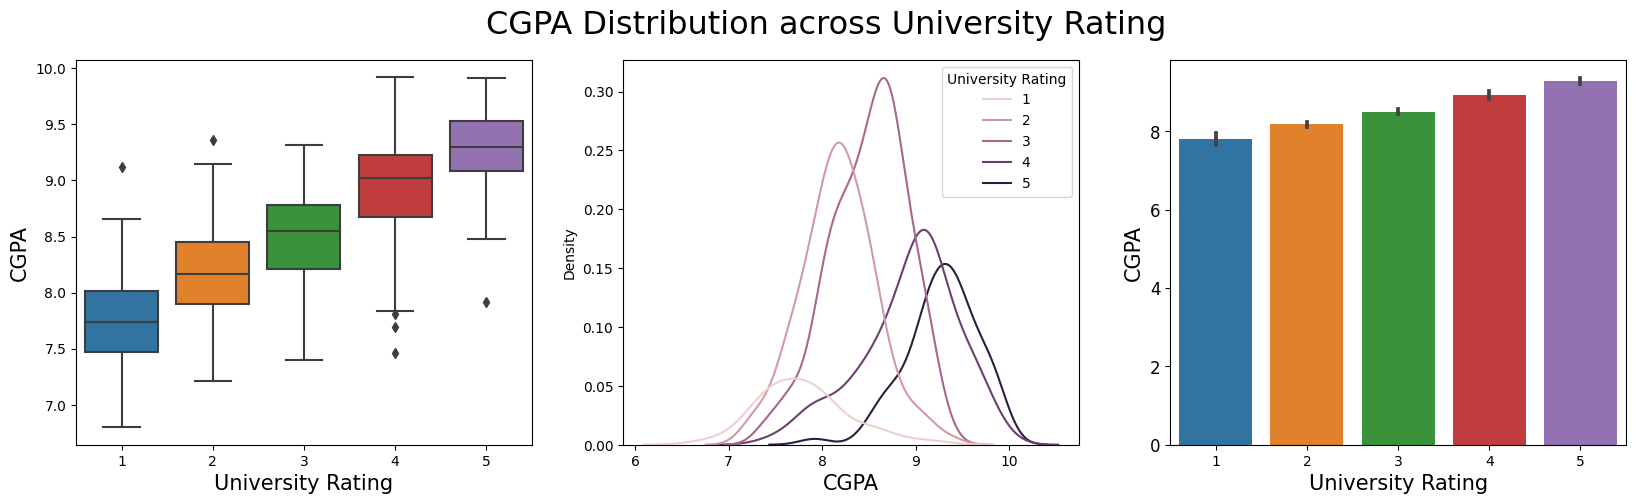

In [ ]:
# CGPA Distribution across University Rating
# We can see that the Mean CGPA and the distribution increases with increase in Univeraity Ratings

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'CGPA' , data = df , x = 'University Rating')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('University Rating' , fontsize = 15)
plt.ylabel('CGPA' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'CGPA' , data = df , hue = 'University Rating')
plt.xticks(fontsize = 10)
plt.xlabel('CGPA' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'CGPA' , data = df , x = 'University Rating' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('University Rating' , fontsize = 15)
plt.ylabel('CGPA' , fontsize = 15)

fig.suptitle("CGPA Distribution across University Rating" , fontsize = 23)
plt.show()

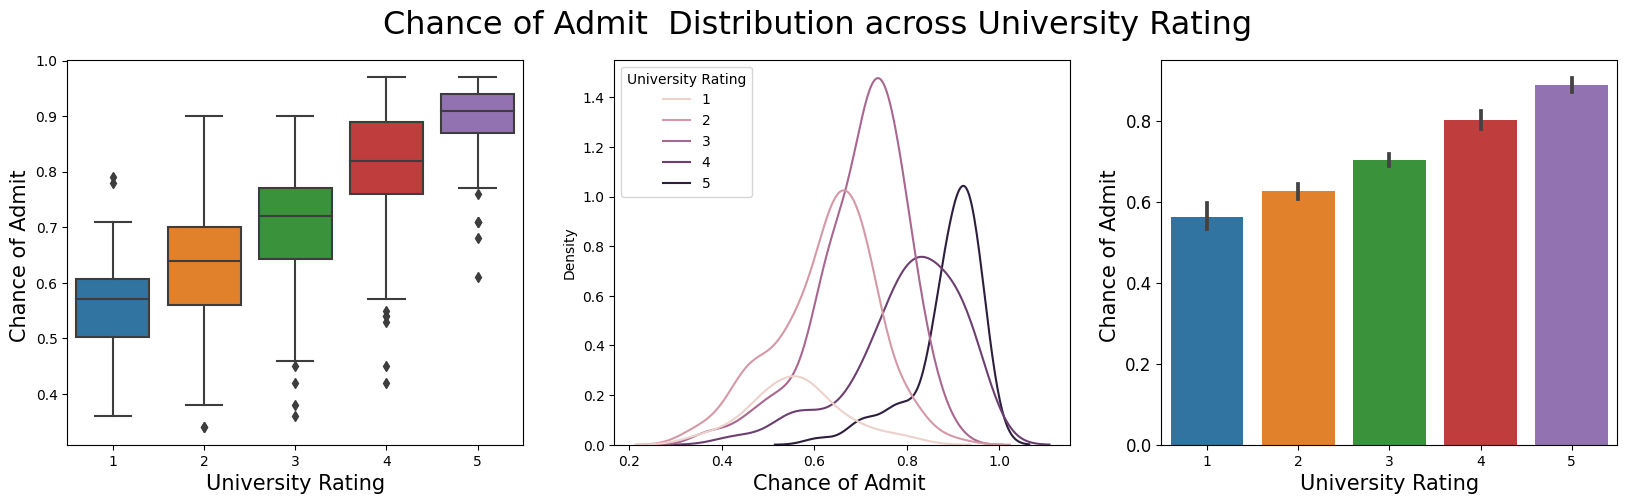

In [ ]:
# Chance of Admit Distribution across University Rating
# We can see that the Mean Chance of Admit and the distribution increases with increase in Univeraity Ratings

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Chance of Admit ' , data = df , x = 'University Rating')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('University Rating' , fontsize = 15)
plt.ylabel('Chance of Admit ' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'Chance of Admit ' , data = df , hue = 'University Rating')
plt.xticks(fontsize = 10)
plt.xlabel('Chance of Admit ' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'Chance of Admit ' , data = df , x = 'University Rating' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('University Rating' , fontsize = 15)
plt.ylabel('Chance of Admit ' , fontsize = 15)

fig.suptitle("Chance of Admit  Distribution across University Rating" , fontsize = 23)
plt.show()

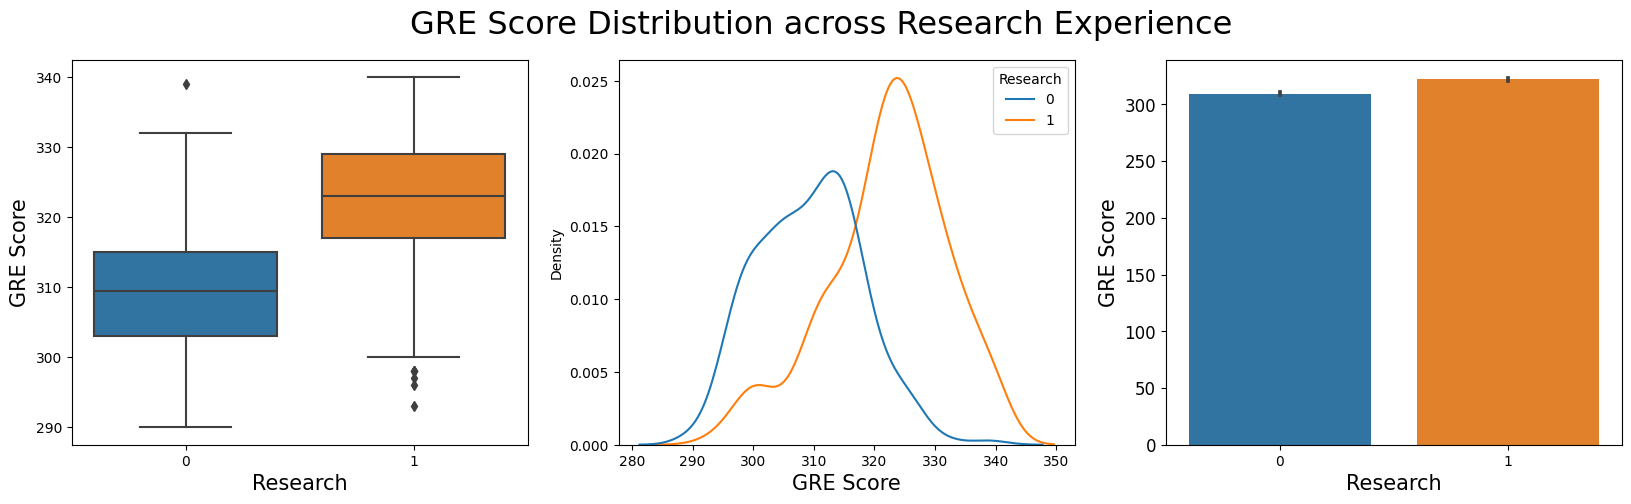

In [ ]:
# GRE Score Distribution across Research Experience
# We can see that the Mean GRE Score and the distribution is more for Research Experience and there are some outliers for Research experience with low GRE Score

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'GRE Score' , data = df , x = 'Research')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Research' , fontsize = 15)
plt.ylabel('GRE Score' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'GRE Score' , data = df , hue = 'Research')
plt.xticks(fontsize = 10)
plt.xlabel('GRE Score' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'GRE Score' , data = df , x = 'Research' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Research' , fontsize = 15)
plt.ylabel('GRE Score' , fontsize = 15)

fig.suptitle("GRE Score Distribution across Research Experience" , fontsize = 23)
plt.show()

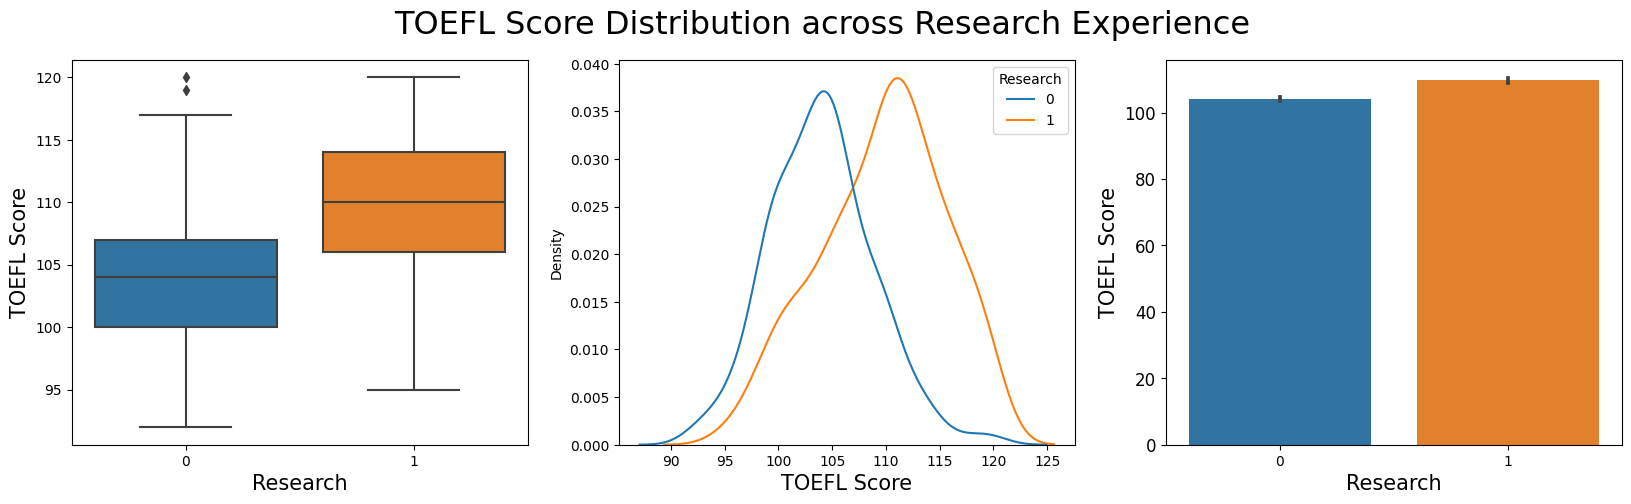

In [ ]:
# TOEFL Score Distribution across Research Experience
# We can see that the Mean TOEFL Score and the distribution is more for Research Experience

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'TOEFL Score' , data = df , x = 'Research')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Research' , fontsize = 15)
plt.ylabel('TOEFL Score' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'TOEFL Score' , data = df , hue = 'Research')
plt.xticks(fontsize = 10)
plt.xlabel('TOEFL Score' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'TOEFL Score' , data = df , x = 'Research' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Research' , fontsize = 15)
plt.ylabel('TOEFL Score' , fontsize = 15)

fig.suptitle("TOEFL Score Distribution across Research Experience" , fontsize = 23)
plt.show()

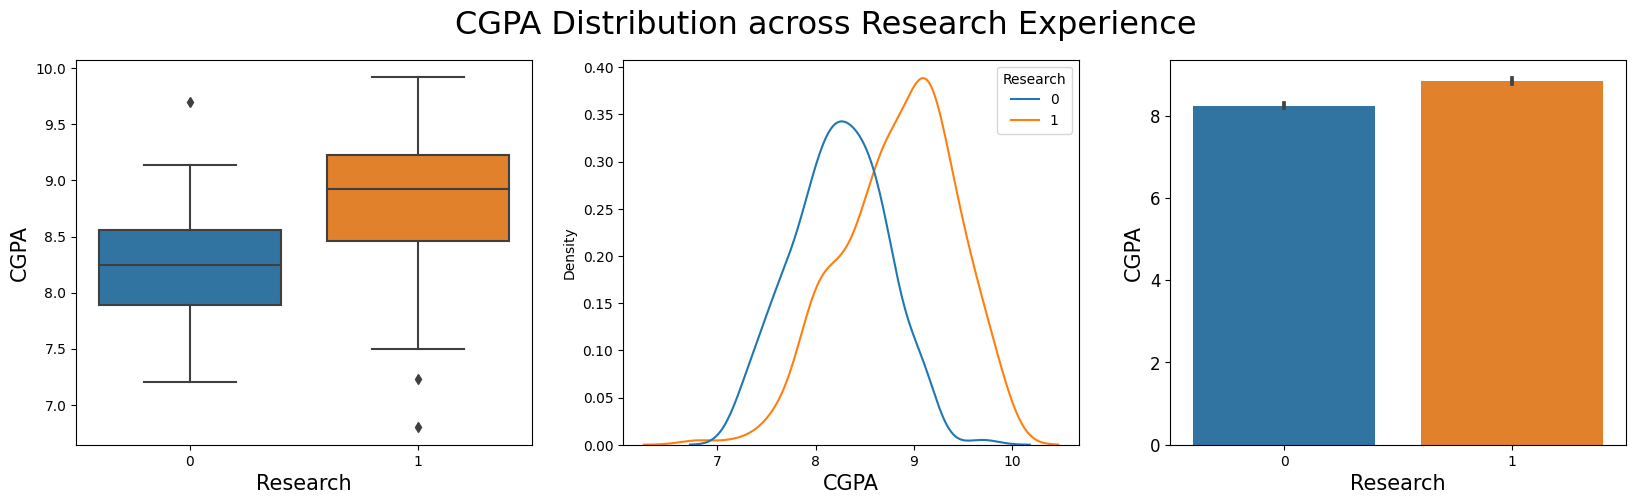

In [ ]:
# CGPA Distribution across Research Experience
# We can see that the Mean CGPA and the distribution is more for Research Experience

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'CGPA' , data = df , x = 'Research')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Research' , fontsize = 15)
plt.ylabel('CGPA' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'CGPA' , data = df , hue = 'Research')
plt.xticks(fontsize = 10)
plt.xlabel('CGPA' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'CGPA' , data = df , x = 'Research' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Research' , fontsize = 15)
plt.ylabel('CGPA' , fontsize = 15)

fig.suptitle("CGPA Distribution across Research Experience" , fontsize = 23)
plt.show()

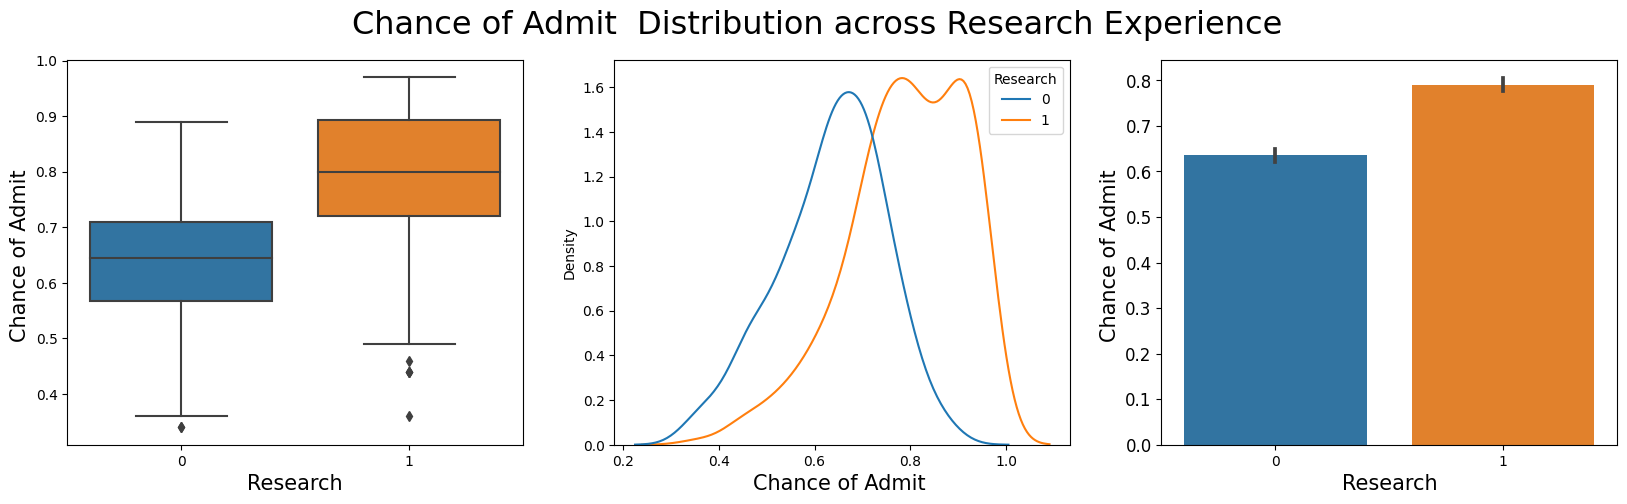

In [ ]:
# Chance of Admit Distribution across Research Experience
# We can see that the Mean CGPA and the distribution is more for Research Experience

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Chance of Admit ' , data = df , x = 'Research')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Research' , fontsize = 15)
plt.ylabel('Chance of Admit ' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'Chance of Admit ' , data = df , hue = 'Research')
plt.xticks(fontsize = 10)
plt.xlabel('Chance of Admit ' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'Chance of Admit ' , data = df , x = 'Research' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('Research' , fontsize = 15)
plt.ylabel('Chance of Admit ' , fontsize = 15)

fig.suptitle("Chance of Admit  Distribution across Research Experience" , fontsize = 23)
plt.show()

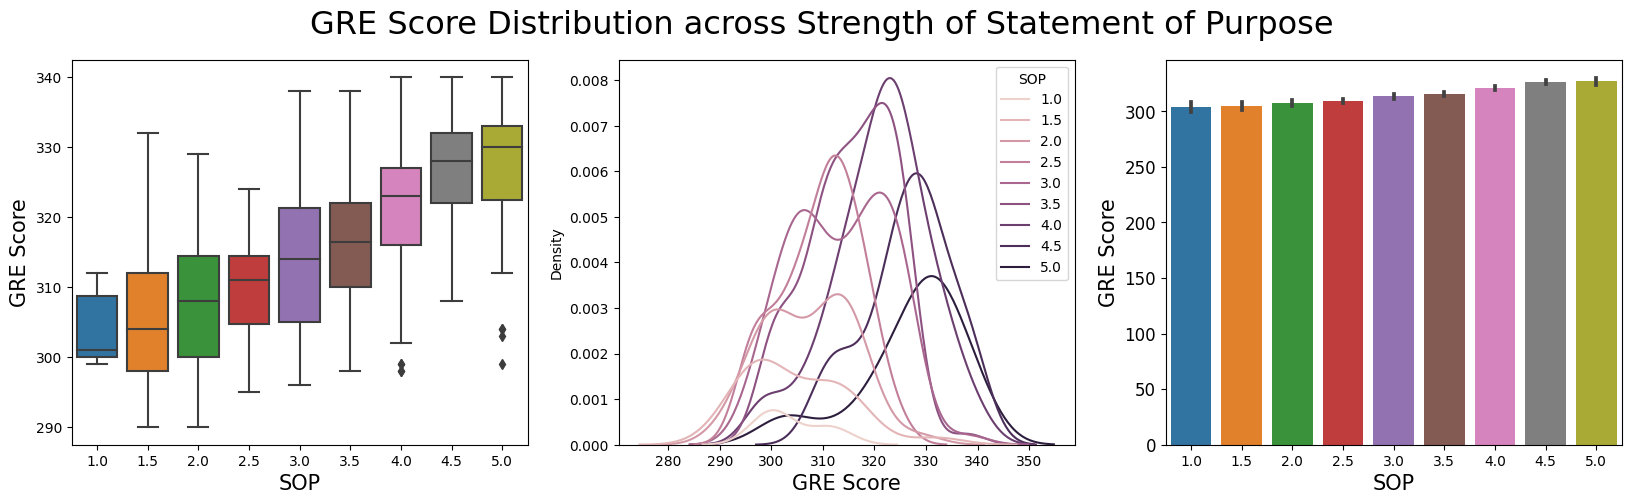

In [ ]:
# GRE Score Distribution across Strength of Statement of Purpose
# We can see that the Mean GRE Score and the distribution is more for Strength of Statement of Purpose

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'GRE Score' , data = df , x = 'SOP')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('SOP' , fontsize = 15)
plt.ylabel('GRE Score' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'GRE Score' , data = df , hue = 'SOP')
plt.xticks(fontsize = 10)
plt.xlabel('GRE Score' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'GRE Score' , data = df , x = 'SOP' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('SOP' , fontsize = 15)
plt.ylabel('GRE Score' , fontsize = 15)

fig.suptitle("GRE Score Distribution across Strength of Statement of Purpose" , fontsize = 23)
plt.show()

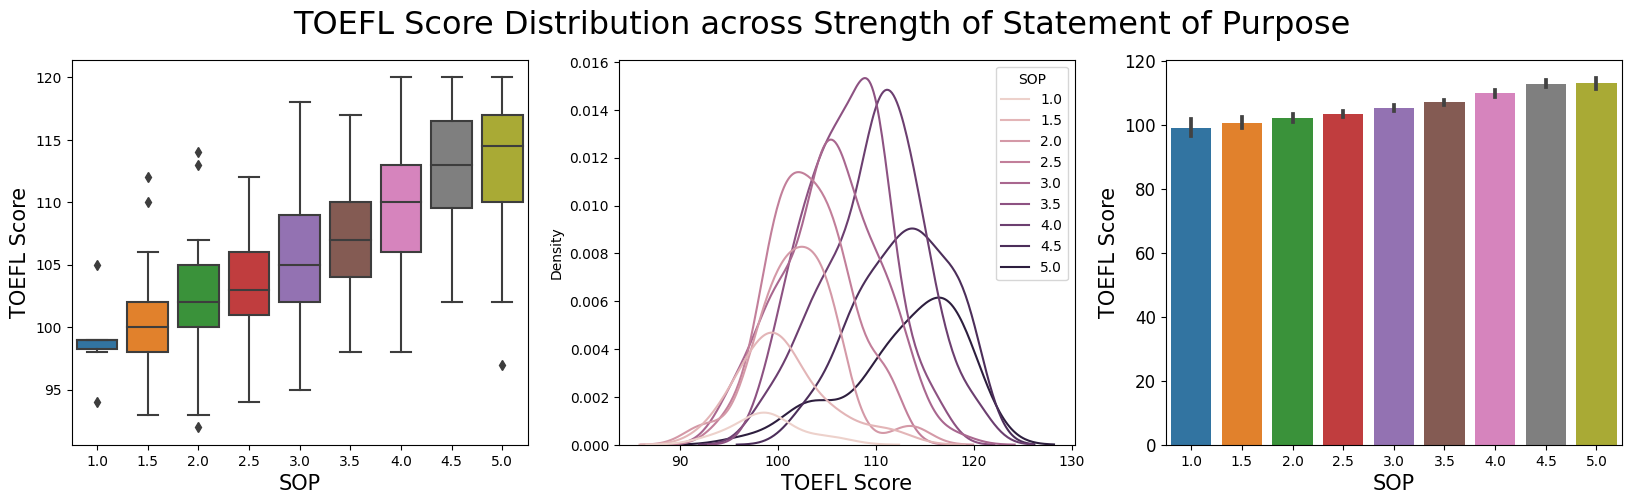

In [ ]:
# TOEFL Score Distribution across Strength of Statement of Purpose
# We can see that the Mean TOEFL Score and the distribution is more for Strength of Statement of Purpose

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'TOEFL Score' , data = df , x = 'SOP')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('SOP' , fontsize = 15)
plt.ylabel('TOEFL Score' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'TOEFL Score' , data = df , hue = 'SOP')
plt.xticks(fontsize = 10)
plt.xlabel('TOEFL Score' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'TOEFL Score' , data = df , x = 'SOP' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('SOP' , fontsize = 15)
plt.ylabel('TOEFL Score' , fontsize = 15)

fig.suptitle("TOEFL Score Distribution across Strength of Statement of Purpose" , fontsize = 23)
plt.show()

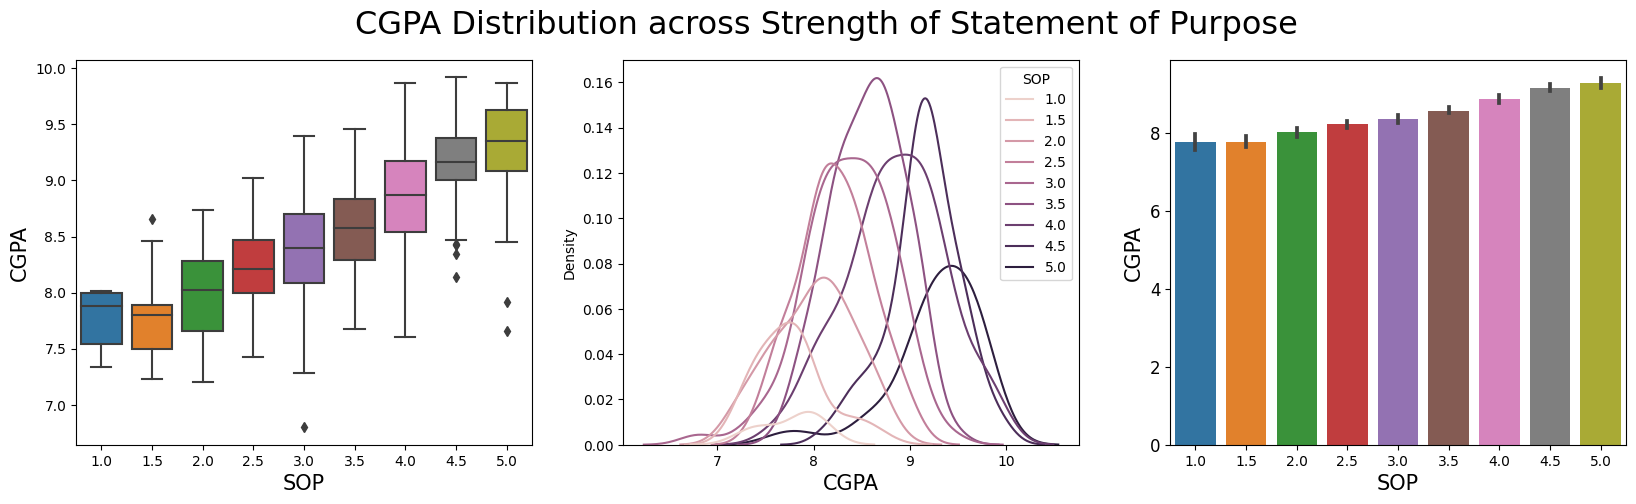

In [ ]:
# CGPA Distribution across Strength of Statement of Purpose
# We can see that the Mean CGPA and the distribution is more for Strength of Statement of Purpose

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'CGPA' , data = df , x = 'SOP')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('SOP' , fontsize = 15)
plt.ylabel('CGPA' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'CGPA' , data = df , hue = 'SOP')
plt.xticks(fontsize = 10)
plt.xlabel('CGPA' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'CGPA' , data = df , x = 'SOP' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('SOP' , fontsize = 15)
plt.ylabel('CGPA' , fontsize = 15)

fig.suptitle("CGPA Distribution across Strength of Statement of Purpose" , fontsize = 23)
plt.show()

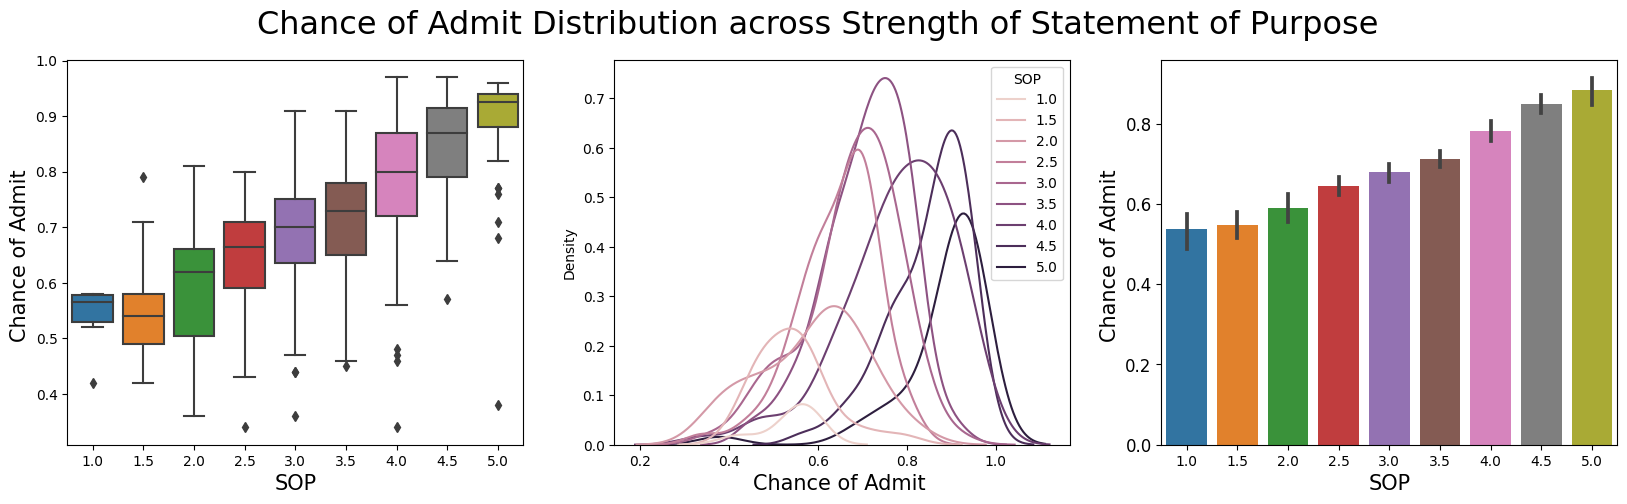

In [ ]:
# Chance of Admit Distribution across Strength of Statement of Purpose
# We can see that the Mean Chance of Admit and the distribution is more for Strength of Statement of Purpose

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Chance of Admit ' , data = df , x = 'SOP')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('SOP' , fontsize = 15)
plt.ylabel('Chance of Admit ' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'Chance of Admit ' , data = df , hue = 'SOP')
plt.xticks(fontsize = 10)
plt.xlabel('Chance of Admit ' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'Chance of Admit ' , data = df , x = 'SOP' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('SOP' , fontsize = 15)
plt.ylabel('Chance of Admit ' , fontsize = 15)

fig.suptitle("Chance of Admit Distribution across Strength of Statement of Purpose" , fontsize = 23)
plt.show()

<ipython-input-193-b9e57fd170d6>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = 'GRE Score' , data = df , hue = 'LOR ')


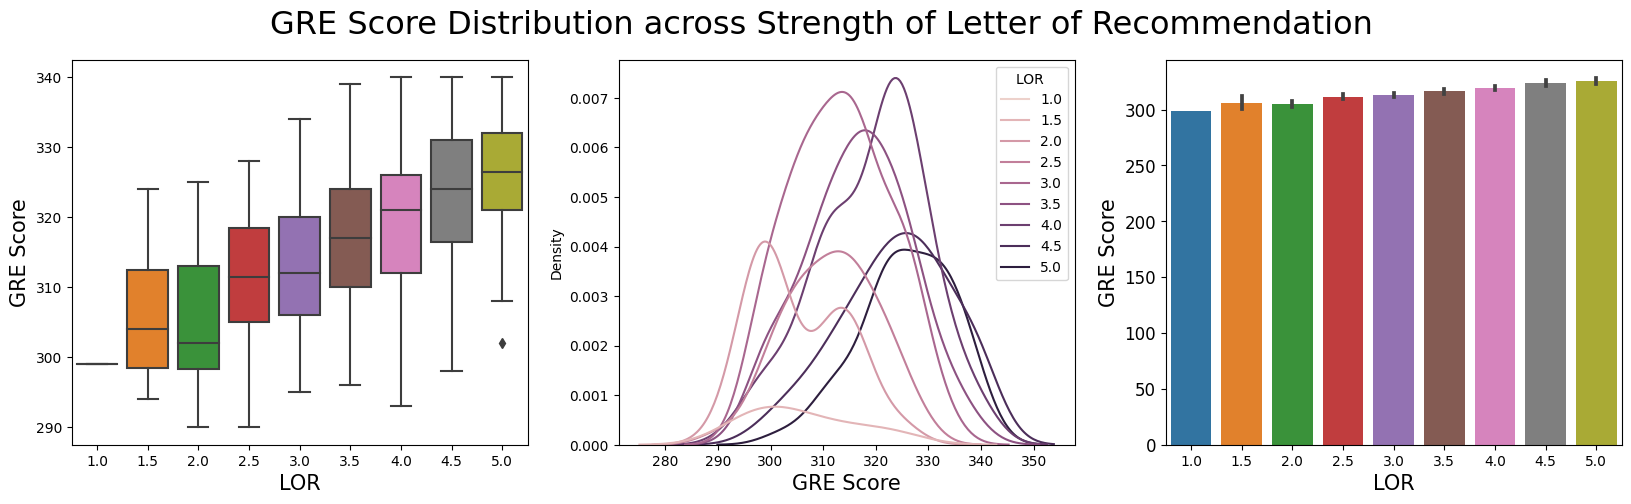

In [ ]:
# GRE Score Distribution across Strength of Letter of Recommendation
# We can see that the Mean GRE Score and the distribution is more for Letter of Recommendation

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'GRE Score' , data = df , x = 'LOR ')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('LOR' , fontsize = 15)
plt.ylabel('GRE Score' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'GRE Score' , data = df , hue = 'LOR ')
plt.xticks(fontsize = 10)
plt.xlabel('GRE Score' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'GRE Score' , data = df , x = 'LOR ' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('LOR' , fontsize = 15)
plt.ylabel('GRE Score' , fontsize = 15)

fig.suptitle("GRE Score Distribution across Strength of Letter of Recommendation" , fontsize = 23)
plt.show()

<ipython-input-194-8ddc575b3e80>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = 'TOEFL Score' , data = df , hue = 'LOR ')


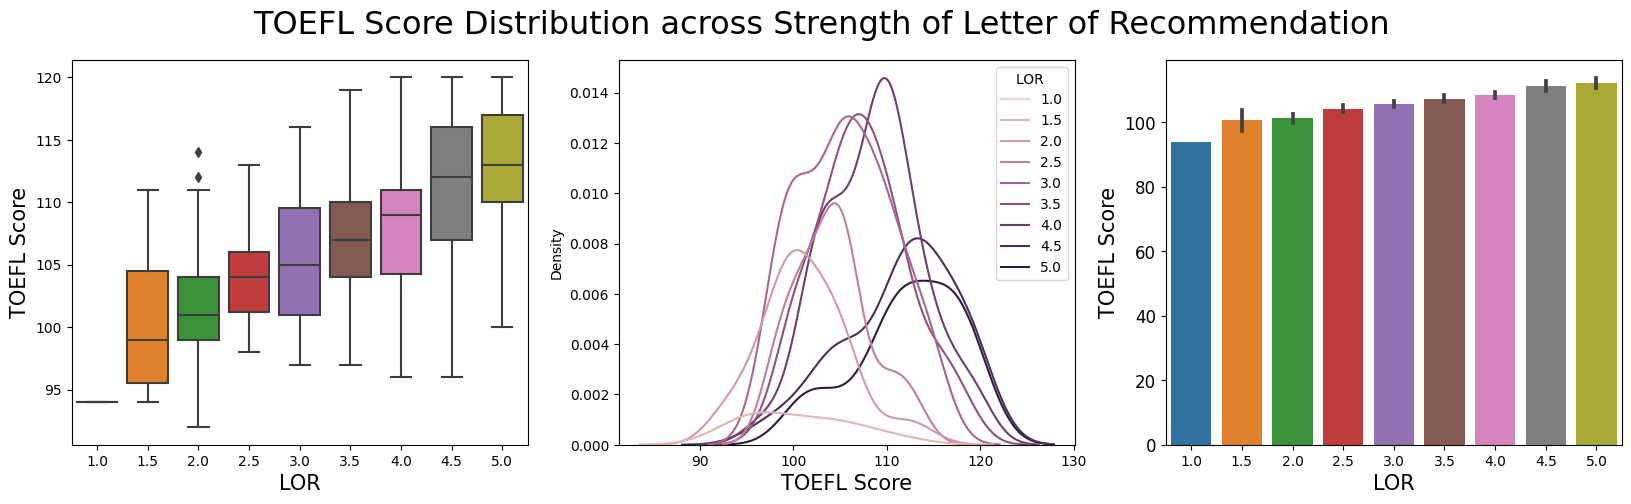

In [ ]:
# TOEFL Score Distribution across Strength of Letter of Recommendation
# We can see that the Mean TOEFL Score and the distribution is more for Letter of Recommendation

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'TOEFL Score' , data = df , x = 'LOR ')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('LOR' , fontsize = 15)
plt.ylabel('TOEFL Score' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'TOEFL Score' , data = df , hue = 'LOR ')
plt.xticks(fontsize = 10)
plt.xlabel('TOEFL Score' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'TOEFL Score' , data = df , x = 'LOR ' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('LOR' , fontsize = 15)
plt.ylabel('TOEFL Score' , fontsize = 15)

fig.suptitle("TOEFL Score Distribution across Strength of Letter of Recommendation" , fontsize = 23)
plt.show()

<ipython-input-195-e2265124268c>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = 'CGPA' , data = df , hue = 'LOR ')


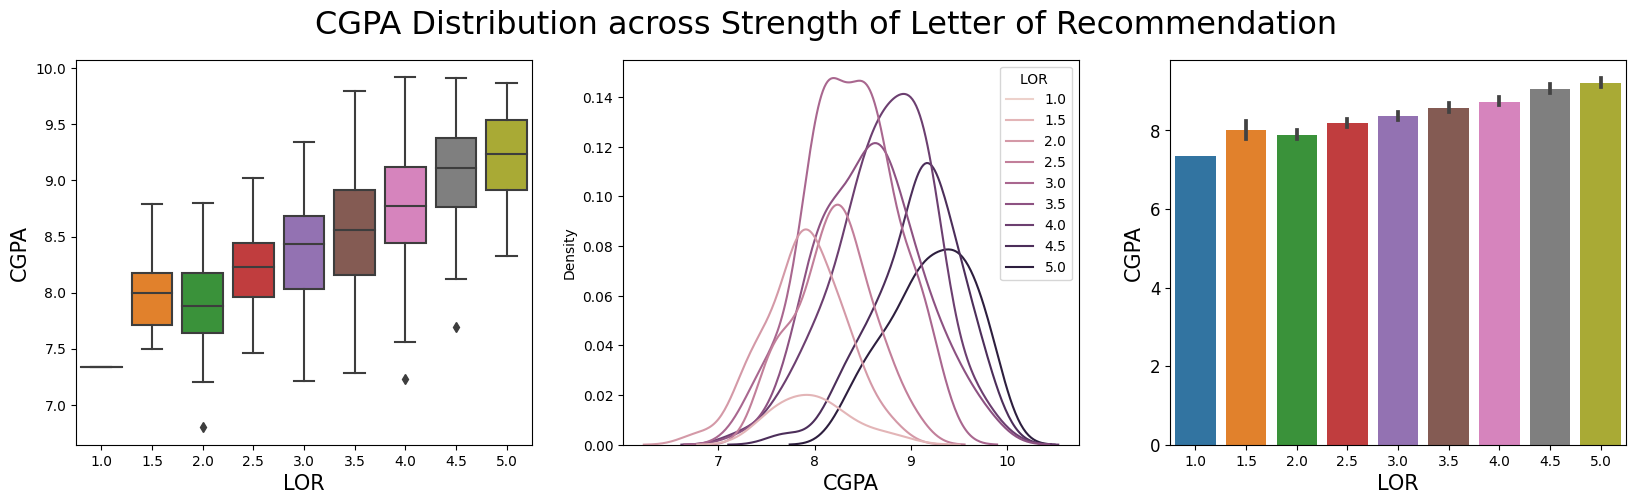

In [ ]:
# CGPA Distribution across Strength of Letter of Recommendation
# We can see that the Mean CGPA and the distribution is more for Letter of Recommendation

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'CGPA' , data = df , x = 'LOR ')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('LOR' , fontsize = 15)
plt.ylabel('CGPA' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'CGPA' , data = df , hue = 'LOR ')
plt.xticks(fontsize = 10)
plt.xlabel('CGPA' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'CGPA' , data = df , x = 'LOR ' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('LOR' , fontsize = 15)
plt.ylabel('CGPA' , fontsize = 15)

fig.suptitle("CGPA Distribution across Strength of Letter of Recommendation" , fontsize = 23)
plt.show()

<ipython-input-196-7e3a1c4b2d32>:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = 'Chance of Admit ' , data = df , hue = 'LOR ')


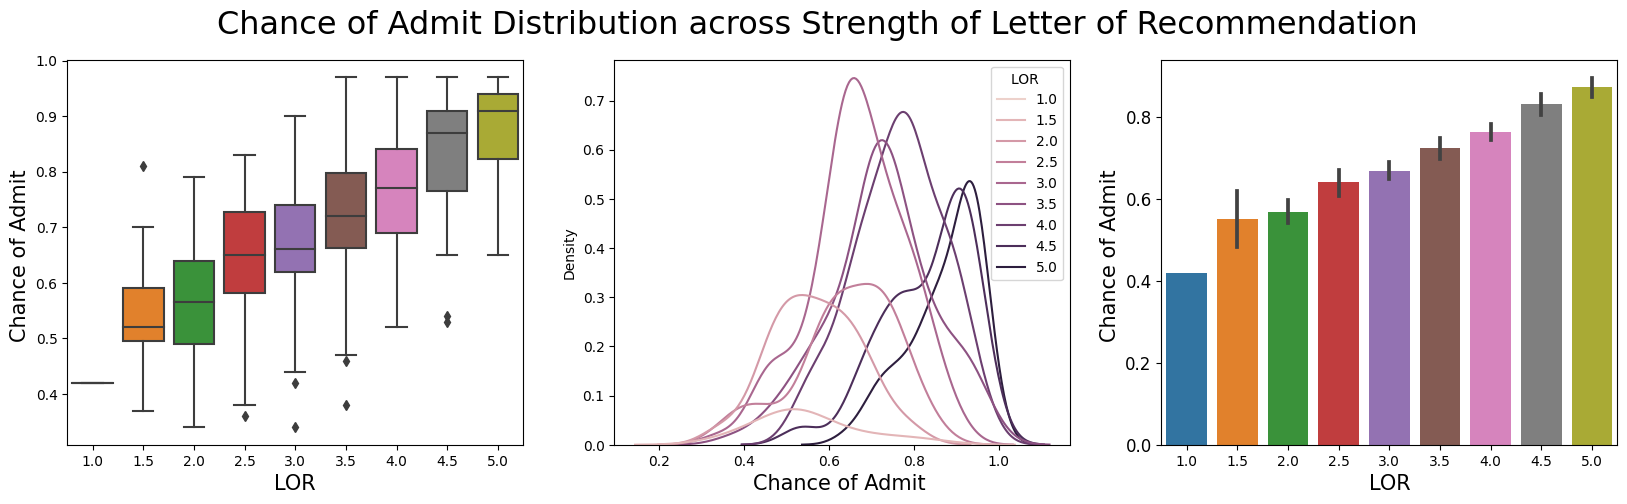

In [ ]:
# Chance of Admit Distribution across Strength of Letter of Recommendation
# We can see that the Mean Chance of Admit  and the distribution is more for Letter of Recommendation

fig = plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Chance of Admit ' , data = df , x = 'LOR ')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('LOR' , fontsize = 15)
plt.ylabel('Chance of Admit ' , fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(x = 'Chance of Admit ' , data = df , hue = 'LOR ')
plt.xticks(fontsize = 10)
plt.xlabel('Chance of Admit ' , fontsize = 15)

plt.subplot(1,3,3)
sns.barplot(y = 'Chance of Admit ' , data = df , x = 'LOR ' , estimator = np.mean)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel('LOR' , fontsize = 15)
plt.ylabel('Chance of Admit ' , fontsize = 15)

fig.suptitle("Chance of Admit Distribution across Strength of Letter of Recommendation" , fontsize = 23)
plt.show()

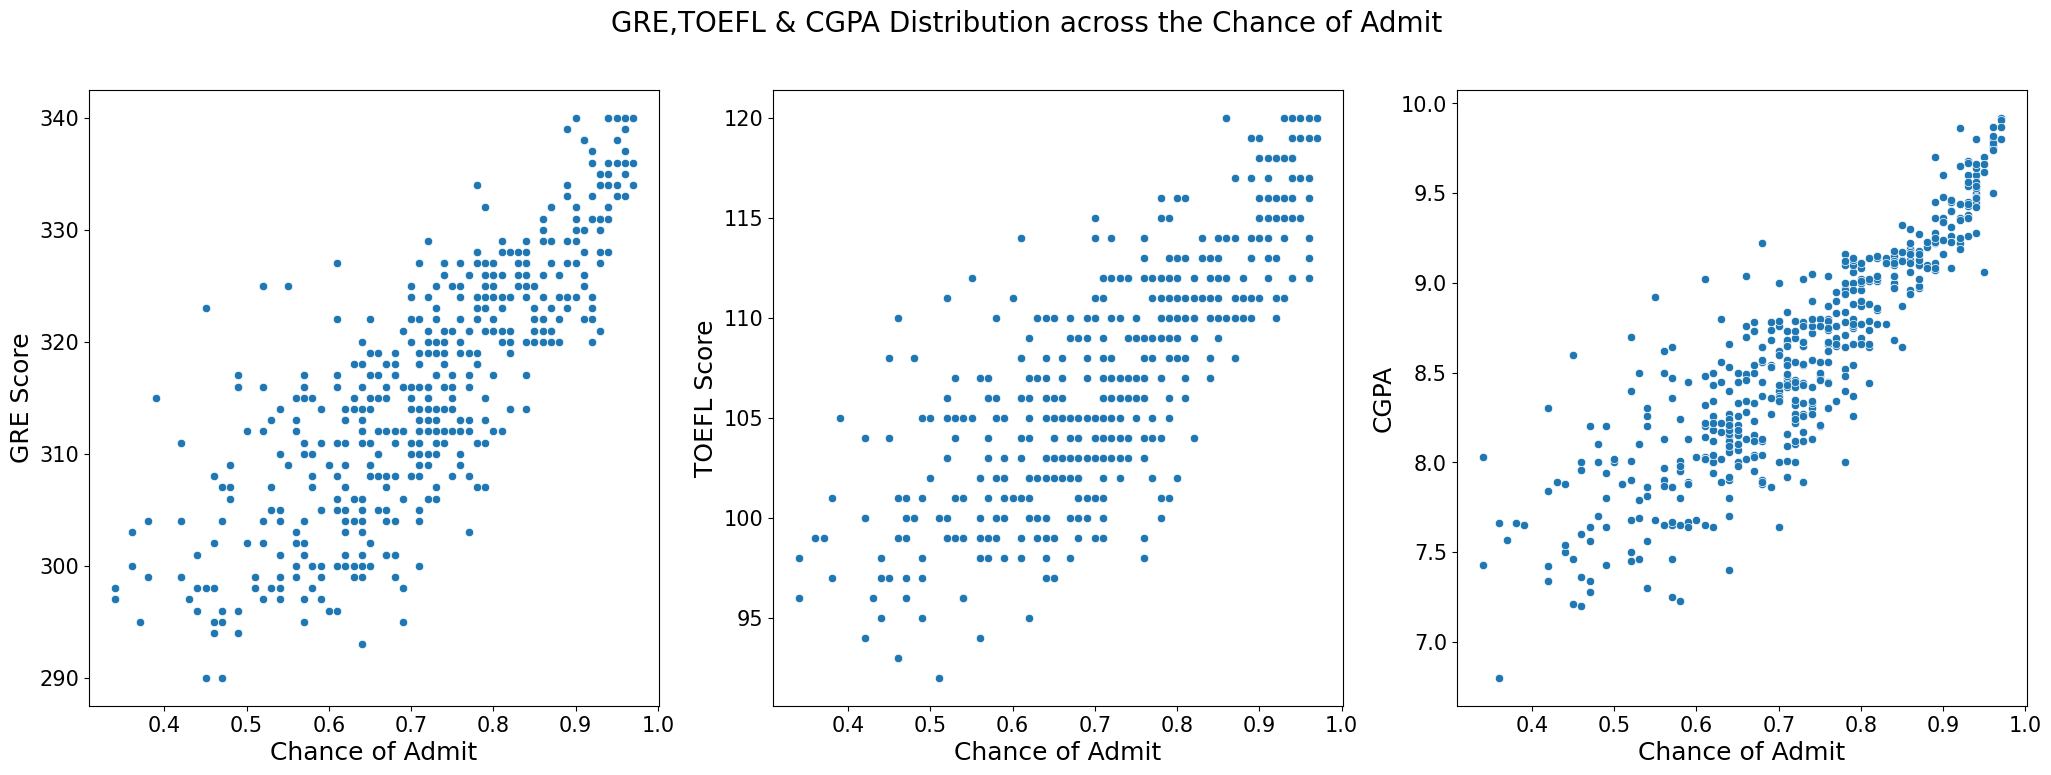

In [ ]:
# GRE,TOEFL & CGPA Distribution across the Chance of Admit
# Chance of Admit increases with increase in GRE, TOEFL & CGPA

plt.figure(figsize = (25,8))

plt.subplot(1,3,1)
sns.scatterplot(x = 'Chance of Admit ' , y = 'GRE Score' , data = df)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Chance of Admit' , fontsize = 18)
plt.ylabel('GRE Score' , fontsize = 18)

plt.subplot(1,3,2)
sns.scatterplot(x = 'Chance of Admit ' , y = 'TOEFL Score' , data = df)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Chance of Admit' , fontsize = 18)
plt.ylabel('TOEFL Score' , fontsize = 18)

plt.subplot(1,3,3)
sns.scatterplot(x = 'Chance of Admit ' , y = 'CGPA' , data = df)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Chance of Admit' , fontsize = 18)
plt.ylabel('CGPA' , fontsize = 18)

plt.suptitle("GRE,TOEFL & CGPA Distribution across the Chance of Admit" , fontsize = 20)
plt.show()

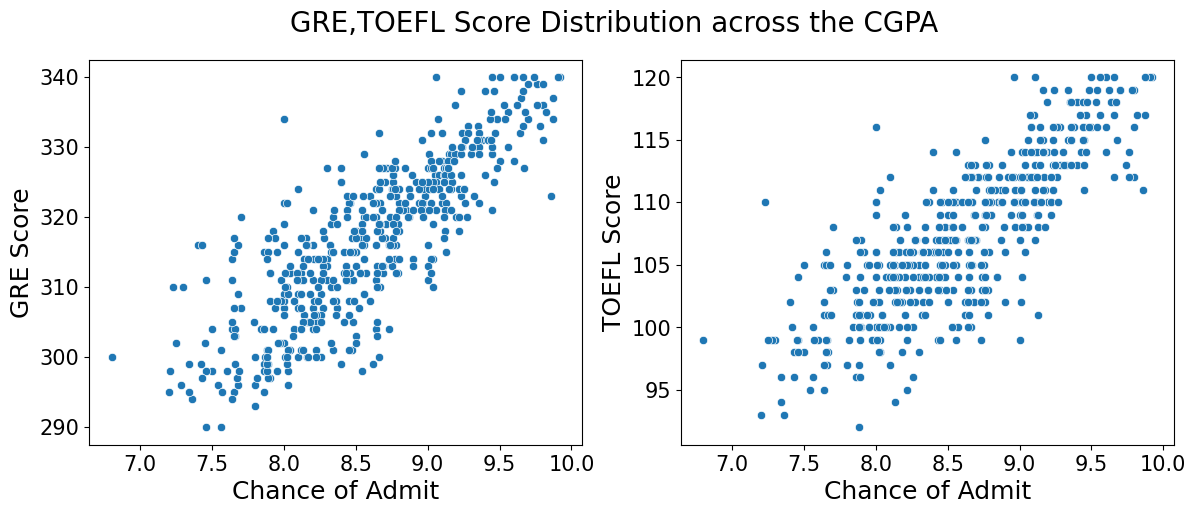

In [ ]:
# GRE,TOEFL Score Distribution across the CGPA
# Chance of Admit increases with increase in GRE, TOEFL

plt.figure(figsize = (14,5))

plt.subplot(1,2,1)
sns.scatterplot(x = 'CGPA' , y = 'GRE Score' , data = df)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Chance of Admit' , fontsize = 18)
plt.ylabel('GRE Score' , fontsize = 18)

plt.subplot(1,2,2)
sns.scatterplot(x = 'CGPA' , y = 'TOEFL Score' , data = df)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Chance of Admit' , fontsize = 18)
plt.ylabel('TOEFL Score' , fontsize = 18)

plt.suptitle("GRE,TOEFL Score Distribution across the CGPA" , fontsize = 20)
plt.show()

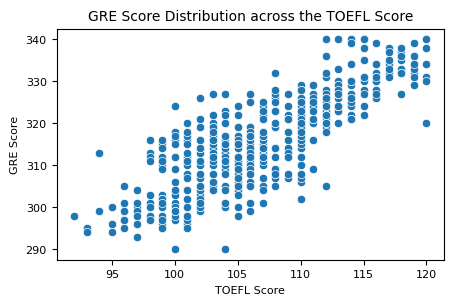

In [ ]:
# GRE Score Distribution across the TOEFL Score

plt.figure(figsize = (5,3))
sns.scatterplot(x = 'TOEFL Score' , y = 'GRE Score' , data = df)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('TOEFL Score' , fontsize = 8)
plt.ylabel('GRE Score' , fontsize = 8)
plt.title("GRE Score Distribution across the TOEFL Score" , fontsize = 10)
plt.show()

# Correlation - heatmaps & pairplots

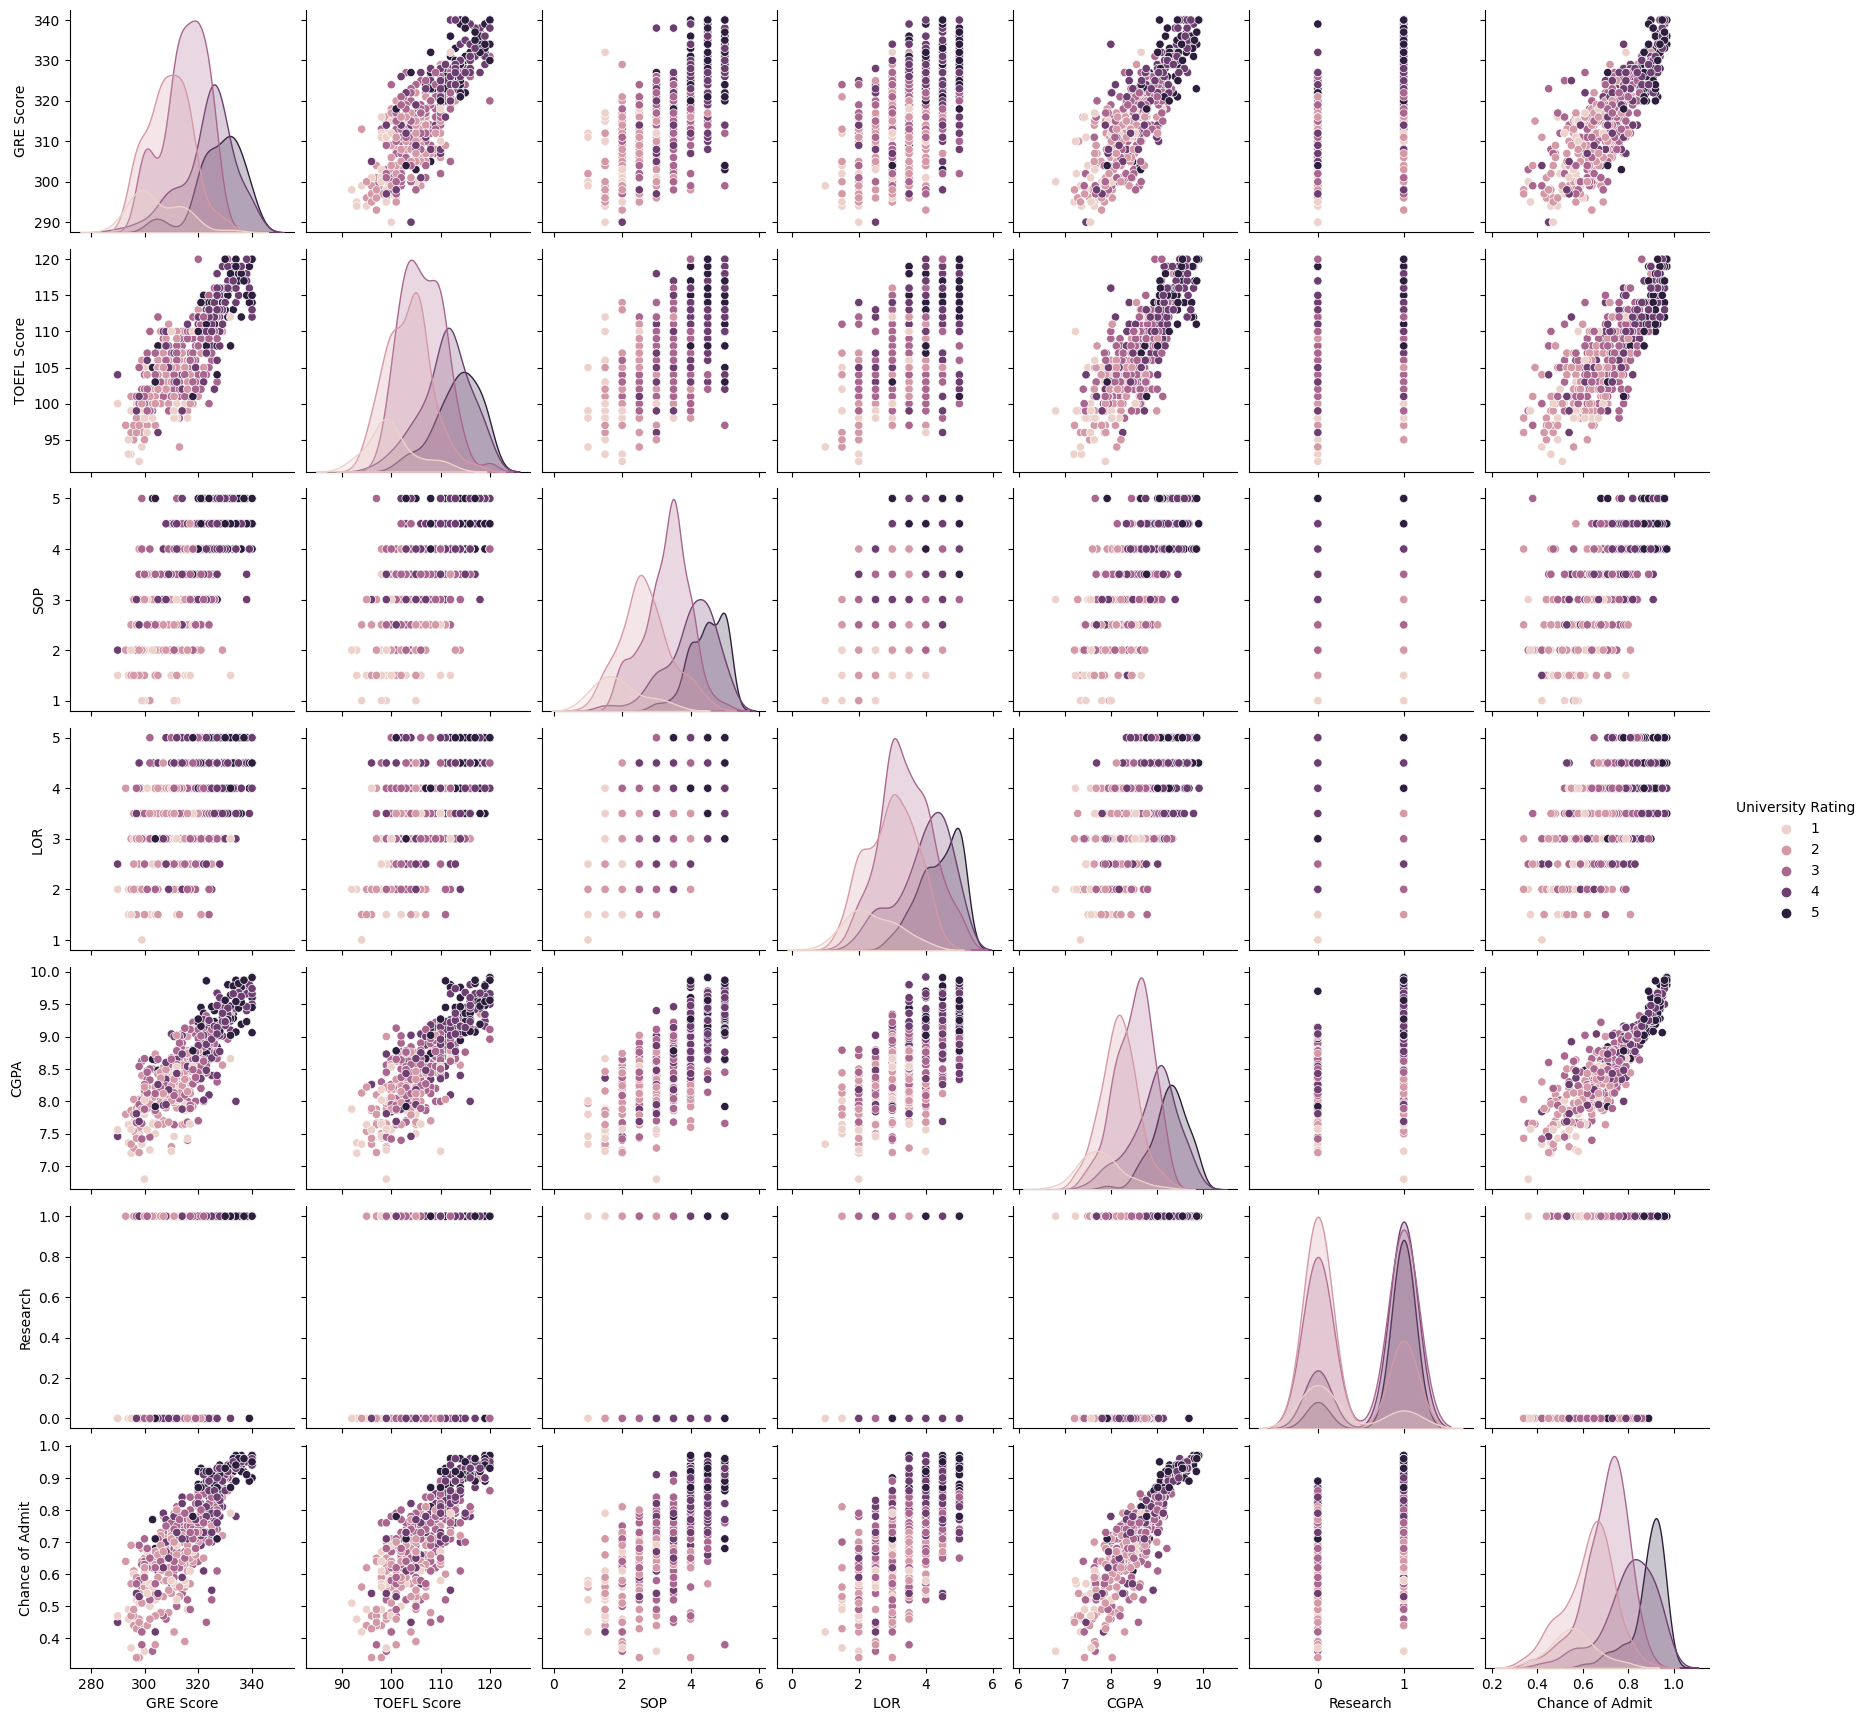

In [ ]:
sns.pairplot(data=df ,hue = 'University Rating')
plt.show()

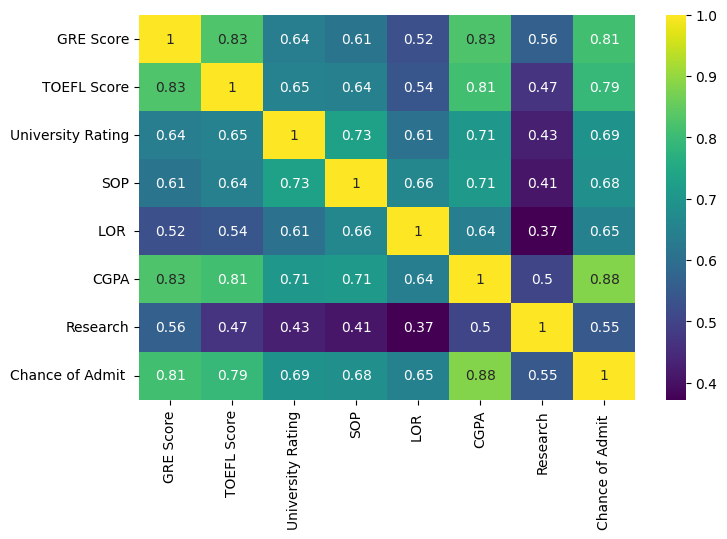

In [ ]:
#  Correlation between 2 variables/features
#  All the numerical varible are correlated GRE Score, TOEFL Score, CGPA and Chance of Admin are highly correlated
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap= "viridis", annot=True)
plt.show()

# Linear Regression Data and Multicollinearity check using Variance Inflation Factor

In [ ]:
# Creating the feature set X containing 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'and the output Y - 'Chance of Admit'

scaler = StandardScaler()
X = scaler.fit_transform(df.loc[:,:'Research'])
X = pd.DataFrame(X, columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'])
Y = df['Chance of Admit ']
X1 = df.loc[:,:'Research'].values

In [ ]:
# Checking the Variance Inflation factor between the features to check multicollinearity and the VIF scores are less than 5

VIF            = pd.DataFrame()
VIF['feature'] = X.columns
VIF['VIF']     = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF

feature       VIF
0          GRE Score  4.464249
1        TOEFL Score  3.904213
2  University Rating  2.621036
3                SOP  2.835210
4               LOR   2.033555
5               CGPA  4.777992
6           Research  1.494008

In [ ]:
# Splitting the data to training set(80%) and test set(20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(400, 7) (100, 7) (400,) (100,)


# Linear Regression using sklearn library

In [ ]:
# Model trained with train dataset and tested with test dataset

model = LinearRegression()
model.fit(X_train, Y_train)
output = model.predict(X_test)
r2 =model.score(X_test, Y_test)
n, d = X_test.shape
resi = Y_test - output
mse = mean_squared_error(Y_test,output)
mae = mean_absolute_error(Y_test,output)

print("R2 score : " , r2)
print("Mean of Residuals" , np.mean((Y_test - output)))
print("Adjusted R2 Score : " , (1 - (((1 - r2) * (n - 1)) / (n - d - 1) )))
print("RMSE : ", np.sqrt(mse))
print("MAE : " , mae)

R2 score :  0.8208741703103732
Mean of Residuals -0.005706590389232242
Adjusted R2 Score :  0.8072450310948581
RMSE :  0.05881410457650769
MAE :  0.040200193804157944


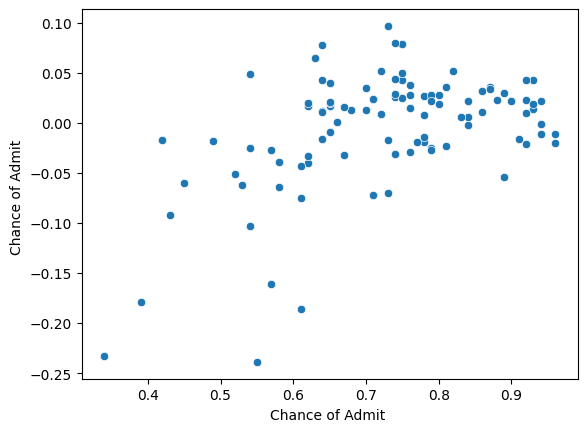

In [ ]:
# Residual Vs Dependent variable 'Chance of Admit' plot : Check for Hetroskedacity
sns.scatterplot(x=Y , y = resi)
plt.show()

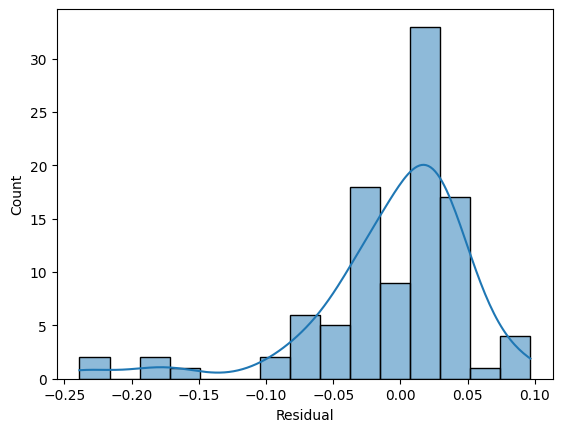

In [ ]:
# Residual - normality Check
sns.histplot(resi , kde = True)
plt.xlabel('Residual')
plt.show()

In [ ]:
# Model trained with train dataset and tested with train dataset

output = model.predict(X_train)
r2 =model.score(X_train, Y_train)
n, d = X_train.shape
mse = mean_squared_error(Y_train,output)
mae = mean_absolute_error(Y_train,output)

print("R2 score : " , r2)
print("Mean of Residuals" , np.mean((Y_train - output)**2))
print("Adjusted R2 Score : " , (1 - (((1 - r2) * (n - 1)) / (n - d - 1) )))
print("RMSE : ", np.sqrt(mse))
print("MAE : " , mae)

R2 score :  0.8215099192361265
Mean of Residuals 0.0035733525638779674
Adjusted R2 Score :  0.818322596365343
RMSE :  0.05977752557506849
MAE :  0.04294488315548092


In [ ]:
# Weights of the hypothesis function
Wei            = pd.DataFrame()
Wei['feature'] = X.columns
Wei['Weight']  = model.coef_
print(Wei)
print("Intercept W0 : " , model.intercept_)

             feature    Weight
0          GRE Score  0.020675
1        TOEFL Score  0.019284
2  University Rating  0.007001
3                SOP  0.002975
4               LOR   0.013338
5               CGPA  0.070514
6           Research  0.009873
Intercept W0 :  0.7228813180778462


# Linear Regression using Statsmodel library

In [ ]:
model   = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):              0.016
Method:                 Least Squares   F-statistic:                              2.194
Date:                Fri, 07 Jul 2023   Prob (F-statistic):                      0.0335
Time:                        12:17:22   Log-Likelihood:                         -548.12
No. Observations:                 500   AIC:                                      1110.
Df Residuals:                     493   BIC:                                      1140.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# Lasso, Ridge and Elastic Regression

In [ ]:
# Using Polynomial Regression trying to improve our current model, this may lead to overfitting, so we will do Lasso, Ridge Regression
scores = []
for i in range(1, 6):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    model = LinearRegression()
    model.fit(X_poly_scaled, Y)
    y_hat = model.predict(X_poly_scaled)

    score = model.score(X_poly_scaled, Y)
    print(score)
    scores.append(score)

0.8219007395178417
0.8369602645339085
0.8618101257874105
0.9289790587509151
1.0


In [ ]:
# Lasso Regression done will result in an average model with R2 score as 0

model = Lasso()
model.fit(X,Y)
output = model.predict(X)
r2 =model.score(X, Y)
n, d = X.shape
mse = mean_squared_error(Y,output)
mae = mean_absolute_error(Y,output)

print("R2 score : " , r2)
print("Mean of Residuals" , np.mean((Y - output)))
print("Adjusted R2 Score : " , (1 - (((1 - r2) * (n - 1)) / (n - d - 1) )))
print("RMSE : ", np.sqrt(mse))
print("MAE : " , mae)

print(model.coef_)
print(model.intercept_)

R2 score :  0.0
Mean of Residuals -5.062616992290714e-17
Adjusted R2 Score :  -0.014227642276422703
RMSE :  0.14099919290549148
MAE :  0.11391392000000002
[0. 0. 0. 0. 0. 0. 0.]
0.72174


In [ ]:
# Ridge Regression model

model = Ridge()
model.fit(X,Y)
output = model.predict(X)
r2 =model.score(X, Y)
n, d = X.shape
mse = mean_squared_error(Y,output)
mae = mean_absolute_error(Y,output)

print("R2 score : " , r2)
print("Mean of Residuals" , np.mean((Y - output)))
print("Adjusted R2 Score : " , (1 - (((1 - r2) * (n - 1)) / (n - d - 1) )))
print("RMSE : ", np.sqrt(mse))
print("MAE : " , mae)

print(model.coef_)
print(model.intercept_)

R2 score :  0.8218976184055076
Mean of Residuals 5.3290705182007515e-18
Adjusted R2 Score :  0.8193636414316022
RMSE :  0.05950473016809717
MAE :  0.04256990269138298
[0.0211222  0.01700136 0.00685586 0.00169896 0.01561719 0.07100043
 0.01207093]
0.7217399999999997


In [ ]:
# Combination of Lasso and Ridge model - Elastic Regression
model = ElasticNet()
model.fit(X,Y)
output = model.predict(X)
r2 =model.score(X, Y)
n, d = X.shape
mse = mean_squared_error(Y,output)
mae = mean_absolute_error(Y,output)

print("R2 score : " , r2)
print("Mean of Residuals" , np.mean((Y - output)))
print("Adjusted R2 Score : " , (1 - (((1 - r2) * (n - 1)) / (n - d - 1) )))
print("RMSE : ", np.sqrt(mse))
print("MAE : " , mae)

print(model.coef_)
print(model.intercept_)

R2 score :  0.0
Mean of Residuals -5.062616992290714e-17
Adjusted R2 Score :  -0.014227642276422703
RMSE :  0.14099919290549148
MAE :  0.11391392000000002
[0. 0. 0. 0. 0. 0. 0.]
0.72174


# Insights and Recommendations

Insights & Recommendations:
***************************

1.	GRE Scores range from 290 to 340 with nearly 50% scores in the range of 308 to 326. TOEFL Scores range from 92 to 120 with nearly 50% scores in the range of 104 to 112. CGPA lies in the range of 7.0 to 10 with nearly 50% data in the range of 8.2 to 9.1
2.	Chance of Admit looks like a gaussian curve with a median of 72% chance of getting admit.
3.	From the bivariate analysis, we can infer that as the university rating increases, GRE, TOEFL scores, Strengths of LOR and SOP, Research experience also increases.
4.	There is a high correlation between GRE Score, TOEFL Score, CGPA and Chance of Admit.
5.	Data is split as train and test sets and VIF is checked for the features to check multicollinearity and all the features have less than 5 VIF.
6.	Linear model is trained with train data and tested with test data and the following metrics were noted,\
•	R2 score:  0.8208741703103732\
•	Mean of Residuals -0.005706590389232242\
•	Adjusted R2 Score:  0.8072450310948581\
•	RMSE:  0.05881410457650769\
•	MAE:  0.040200193804157944
7.	Heteroskedastic and residual normality is checked and there were no issues and assumptions for Linear Regression is met.
8.	CGPA > GRE Score > TOEFL Score > Strength of LOR are the order of weightage for feature importance.
9.	The data available to train the model plays an important role in the effective performance of any model, so we would recommend to collect as much data as possible from data made available by the competitors and the universities sources.
10.	Few more additional features like State level and even more granular features like scholarships, etc can be added and check whether this improves in our prediction.  
